## Mengimport Library

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Read Dataset

In [49]:
df = pd.read_json("/content/Sarcasm_Headlines_Dataset_v2.json", lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


# Melakukan Pengecekan Data yang Null / Tidak Valid

In [50]:
df.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

## Menvisualisasikan Pesebaran Data

<Axes: xlabel='is_sarcastic', ylabel='count'>

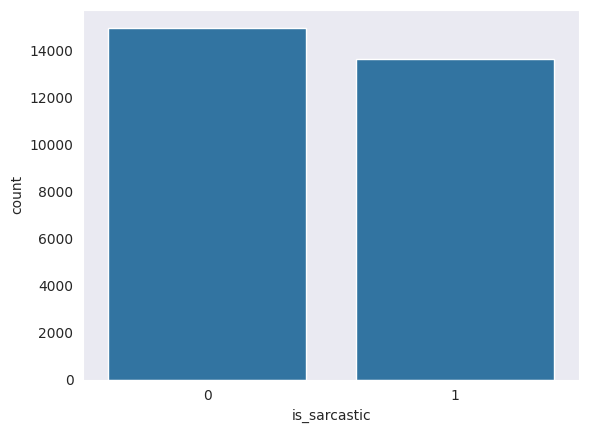

In [51]:
sns.set_style("dark")
sns.countplot(df, x="is_sarcastic")

## Menghilangkan Stopwords (misalnya, "is", "are" "a", "the", "of"), Tanda Baca, Symbol, ataupun Spasi

In [52]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

def preprocess_text(text_data):
	preprocessed_text = []

	for sentence in tqdm(text_data):
		sentence = re.sub(r'[^\w\s]', '', sentence)
		preprocessed_text.append(' '.join(token.lower()
								for token in str(sentence).split()
								if token not in stopwords.words('english')))

	return preprocessed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
preprocessed_review = preprocess_text(df['headline'].values)
df["headline"] = preprocessed_review

100%|██████████| 28619/28619 [00:38<00:00, 742.91it/s]


In [54]:
testku =  preprocess_text(["    a butter of  lov   ee is so gre aat "])
testku

100%|██████████| 1/1 [00:00<00:00, 368.76it/s]


['butter lov ee gre aat']

In [55]:
df['headline']

0        thirtysomething scientists unveil doomsday clo...
1        dem rep totally nails congress falling short g...
2              eat veggies 9 deliciously different recipes
3             inclement weather prevents liar getting work
4        mother comes pretty close using word streaming...
                               ...                        
28614               jews celebrate rosh hashasha something
28615    internal affairs investigator disappointed con...
28616    beautiful acceptance speech week came queer ko...
28617    mars probe destroyed orbiting spielberggates s...
28618                              dad clarifies food stop
Name: headline, Length: 28619, dtype: object

## Membuat Gambar Wordclod untuk Headline Berita yang non-sarcastic

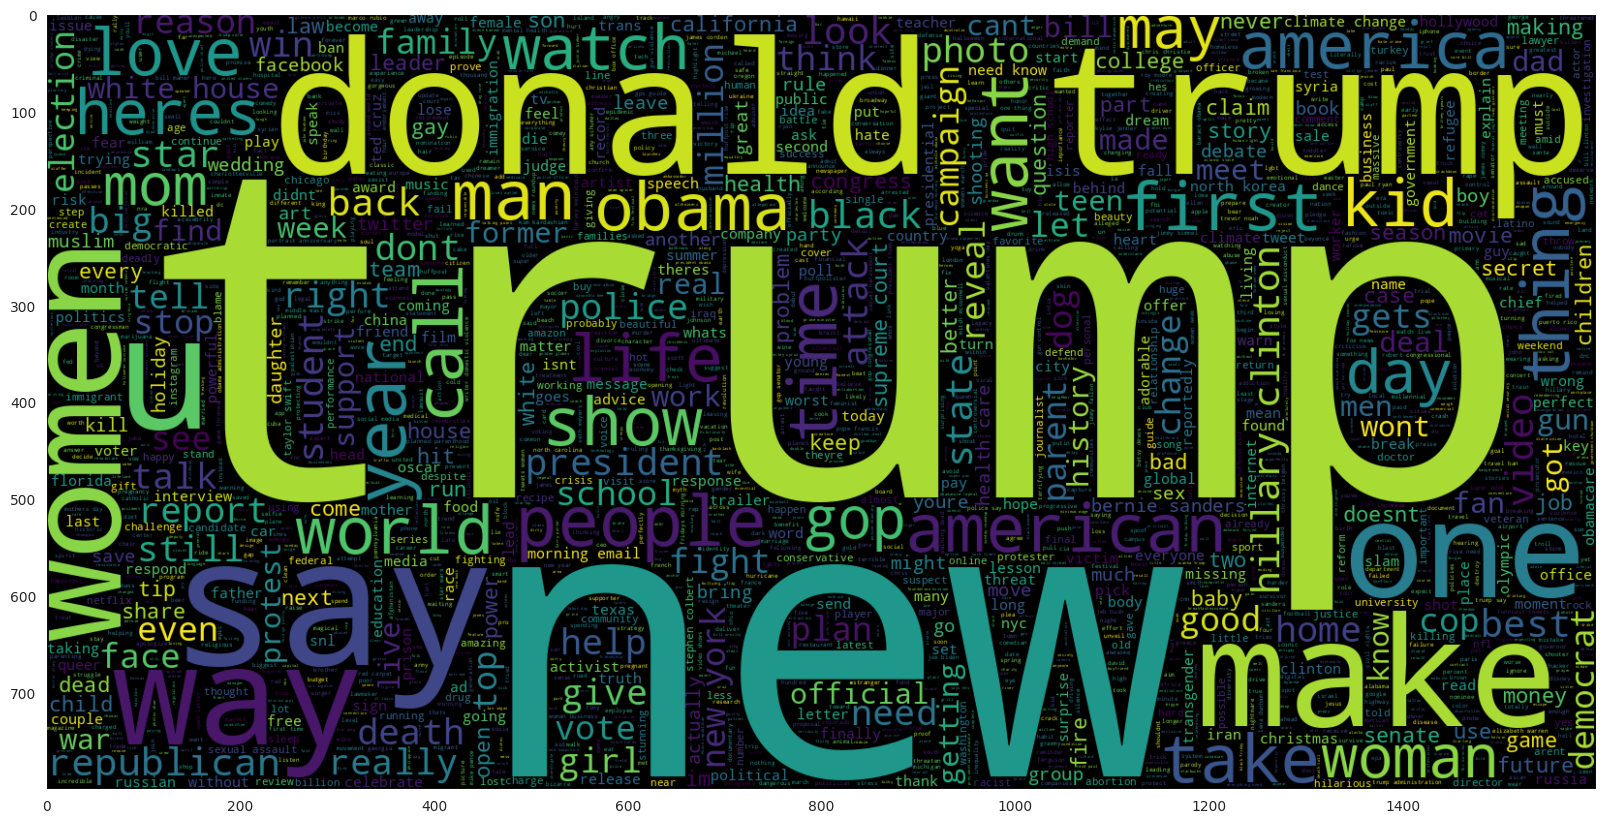

In [56]:
# Mengambil data yang headline beritanya tidak sarkas
non_sarcastic_df = df[df.is_sarcastic == 0]

# Menggabungkan semua headline non-sarcas jadi satu kalimat panjang
all_non_sarcas_str = " ".join(non_sarcastic_df.headline)
all_non_sarcas_str

# Menampilkan wordcloud dari semua headline non-sarcasm
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(all_non_sarcas_str)
plt.imshow(wc , interpolation = 'bilinear')

In [57]:
# Mengambil data yang headline beritanya sarkas
sarcastic_df = df[df.is_sarcastic == 1]

# Menggabungkan semua headline non-sarcas jadi satu kalimat panjang
all_sarcas_str = " ".join(sarcastic_df.headline)
all_sarcas_str

# Menampilkan wordcloud dari semua headline non-sarcasm
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(all_sarcas_str)
plt.imshow(wc , interpolation = 'bilinear')

KeyboardInterrupt: 

<Figure size 2000x2000 with 0 Axes>

## Menampilkan kata yang paling sering muncul

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

# Fungsi ini menerima input corpus (kumpulan text) dan kemudian akan
# mengurutkannya sesuai dengan frekuensi yang paling sering muncul
def get_top_n_words(corpus, n=None):
  # Mengubah corpus menjadi representasi angka
  vec = CountVectorizer().fit(corpus)
  bag_of_words = vec.transform(corpus)

  # Menghitung jumlah occurance / kejadian suatu kata muncul
  sum_words = bag_of_words.sum(axis=0)

  # Mendapatkan kata serta jumlah munculnya suatu kata
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

  # Mengurutkan dari tinggi ke rendah
  words_freq = sorted(words_freq, key=lambda x: x[1],
						reverse=True)

  # Mengembalikan n kata teratas yang paling banyak muncul
  return words_freq[:n]

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

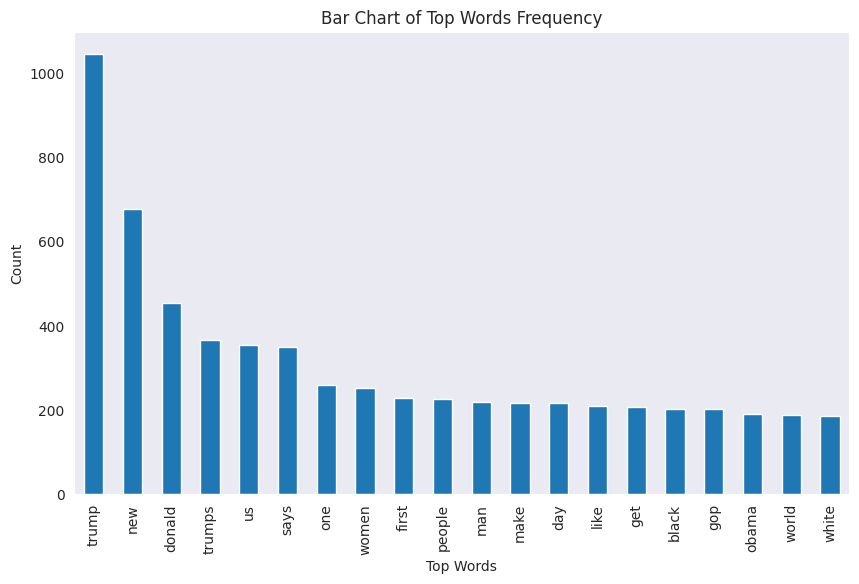

In [59]:
# Menampilkan top words dari headline non sarcastic
common_words = get_top_n_words(non_sarcastic_df.headline , 20)
df1 = pd.DataFrame(common_words, columns=['Word', 'count'])

df1.groupby('Word').sum()['count'].sort_values(ascending=False).plot(
	kind='bar',
	figsize=(10, 6),
	xlabel="Top Words",
	ylabel="Count",
	title="Bar Chart of Top Words Frequency"
)

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

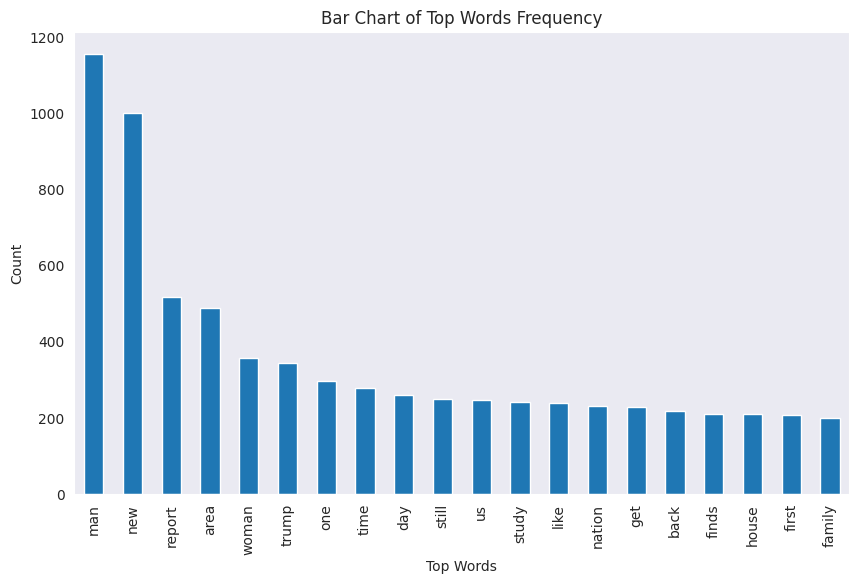

In [60]:
# Menampilkan top words dari headline sarcastic
common_words = get_top_n_words(sarcastic_df.headline , 20)
df1 = pd.DataFrame(common_words, columns=['Word', 'count'])

df1.groupby('Word').sum()['count'].sort_values(ascending=False).plot(
	kind='bar',
	figsize=(10, 6),
	xlabel="Top Words",
	ylabel="Count",
	title="Bar Chart of Top Words Frequency"
)

## Membangun Model

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df['headline'],
													df['is_sarcastic'],
													test_size=0.2, random_state=42)

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
pipe = Pipeline([('vectorizer', TfidfVectorizer(stop_words='english', max_df=0.7)), ('logistic regression', LogisticRegression())])

In [95]:
pipe.fit(x_train, y_train).score(x_test, y_test)

0.8024109014675053

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Mencoba menggunakan 5-Fold Cross Validation
accuracies = cross_val_score(estimator = pipe, X = x_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) #Akurasi menjadi jauh lebih baik setelah digunakan K-Fold Cross Validation
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.67 %
Standard Deviation: 0.33 %


In [97]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2)

# Mencoba menggunakan 5-Fold Cross Validation
accuracies = cross_val_score(estimator = pipe, X = x_train, y = y_train, cv = skf)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) #Akurasi menjadi jauh lebih baik setelah digunakan K-Fold Cross Validation
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.31 %
Standard Deviation: 0.11 %


In [98]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorization = TfidfVectorizer(stop_words='english', max_df=0.7)
# x_train = vectorization.fit_transform(x_train)
# x_test = vectorization.transform(x_test)

In [99]:
# from sklearn.linear_model import LogisticRegression

# log_reg = LogisticRegression()
# log_reg.fit(x_train, y_train)

# # testing the model
# print(accuracy_score(y_train, log_reg.predict(x_train)))
# print(accuracy_score(y_test, log_reg.predict(x_test)))

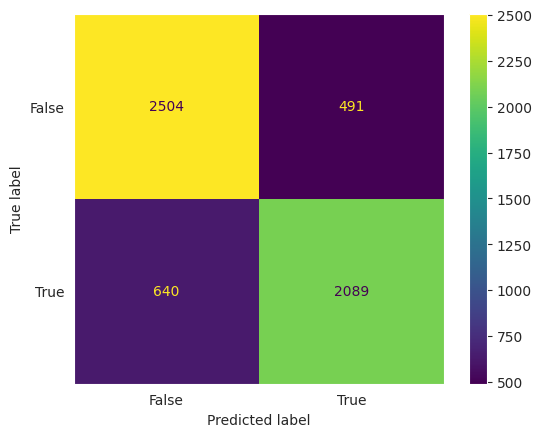

In [100]:
# Confusion matrix of Results from Logistic Regression classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pipe.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

In [101]:
# param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}
# gb_model = GradientBoostingClassifier()

# model = GridSearchCV(gb_model,param_grid)
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
# forest.fit(x_train, y_train)

from sklearn.pipeline import Pipeline
pipe = Pipeline([('vectorizer', TfidfVectorizer(stop_words='english', max_df=0.7)), ('random forest', forest)])

# testing the model
pipe.fit(x_train, y_train).score(x_test, y_test)
# print(accuracy_score(y_train, pipe.predict(x_train)))
# print(accuracy_score(y_test, pipe.predict(x_test)))

0.7479035639412998

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Mencoba menggunakan 5-Fold Cross Validation
accuracies = cross_val_score(estimator = pipe, X = x_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) #Akurasi menjadi jauh lebih baik setelah digunakan K-Fold Cross Validation
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 73.63 %
Standard Deviation: 0.76 %


In [103]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2)

# Mencoba menggunakan 5-Fold Cross Validation
accuracies = cross_val_score(estimator = pipe, X = x_train, y = y_train, cv = skf)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) #Akurasi menjadi jauh lebih baik setelah digunakan K-Fold Cross Validation
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 71.85 %
Standard Deviation: 0.29 %


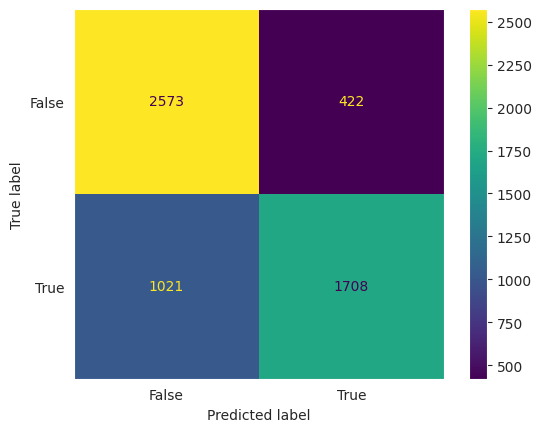

In [104]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pipe.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()